### Supp Figure 3A & C

In [1]:
## import statement

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc
import random
import seaborn as sns
import sklearn

# tissuemosaic import
import tissuemosaic as tp

In [2]:
from tissuemosaic.utils import *
from tissuemosaic.plots import *
from tissuemosaic.models.patch_analyzer import SpatialAutocorrelation, Composition
from tissuemosaic.data.dataset import MetadataCropperDataset
from tissuemosaic.plots.plot_misc import *

[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.


In [3]:
## set seeds
r_seed=t_seed=n_seed=100

random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)



In [4]:
## Make plots directory if it doesn't already exist
try:
    os.mkdir("./plots")
except:
    pass

In [5]:
## plotting parameters

linewidth = 5
tickfontsize = 80
labelfontsize = 80
labelpad = 40
titlefontsize=80
legendfontsize=80

In [6]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# # colors = prop_cycle.by_key()['color']
# colors = plt.get_cmap('tab20')(range(20))

# # assign color to cell type
# cdict = {
#     'APC': colors[2],
#     'CD4+T': colors[3],
#     'CD8+T': colors[0],
#     'DC': colors[3],
#     'DN': colors[7],
#     'DP': colors[4],
#     'Effector Lymphocytes': colors[8],
#     'Other stroma': colors[6],
#     'TEC': colors[1]
# }


colors = sns.color_palette("deep", 10).as_hex()

# assign color to cell type
cdict = {
    'APC': colors[0],
    'CD4+T': colors[4],
    'CD8+T': colors[3],
    'DC': colors[5],
    'DN': colors[6],
    'DP': colors[1],
    'Effector Lymphocytes': colors[2],
    'Other stroma': colors[7],
    'TEC': colors[8]
}


In [7]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = sns.color_palette("deep", 20).as_hex()

# assign color to cell type
cdict_clusters = {
    0: colors[0],
    1: colors[1],
    2: colors[2],
    3: colors[3],
    4: colors[4],
    5: colors[5],
    6: colors[6],
    7: colors[7],
    8: colors[8],
    9: colors[9],
    10: colors[10],
    11: colors[11],
    12: colors[12],
    13: colors[13],
    14: colors[14],
    15: colors[15]
}

colors = sns.color_palette("deep", 10).as_hex()
# assign color to cell type
cdict_cm = {
    'cortex': colors[0],
    'medulla': colors[1]
}

In [8]:
thymus_cluster_dir = os.path.abspath("../TissueMosaic_output/thymus/thymus_spot_clusters/")
thymus_cm_dir = os.path.abspath("../TissueMosaic_data/thymus_anndata/")

In [9]:
fname_list = []
for f in os.listdir(thymus_cluster_dir):
    if f.endswith('.h5ad'):
        fname_list.append(f)

anndata_list = []
anndata_cm_list = []
for fname in fname_list:
    adata = read_h5ad(os.path.join(thymus_cluster_dir, fname))
    anndata_list.append(adata)

    cm_fname = fname[:-16] + '.h5ad'
    adata_cm = read_h5ad(os.path.join(thymus_cm_dir, cm_fname))
    anndata_cm_list.append(adata_cm)

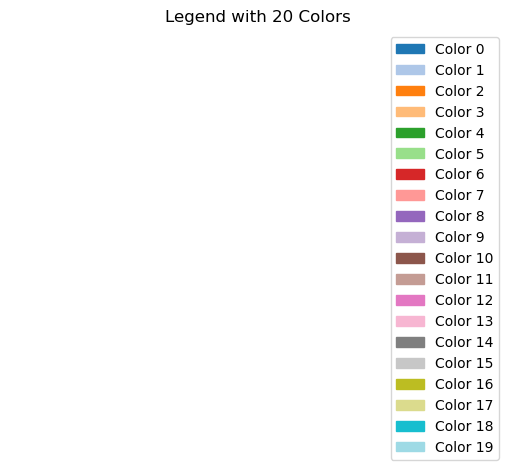

In [10]:
import matplotlib.patches as mpatches

# Generate 20 distinct colors from the 'tab20' colormap
colors = plt.get_cmap('tab20')(range(20))

# Create a figure and axis
fig, ax = plt.subplots()

# Create a list of patches with the corresponding colors
patches = [mpatches.Patch(color=color, label=f'Color {i}') for i, color in enumerate(colors)]

# Add the custom legend to the plot
ax.legend(handles=patches)

# Set the title and remove the axis for a cleaner look
ax.set_title('Legend with 20 Colors')
ax.axis('off')

# Show the plot
plt.show()

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


### Generate subpanel sup fig 3a

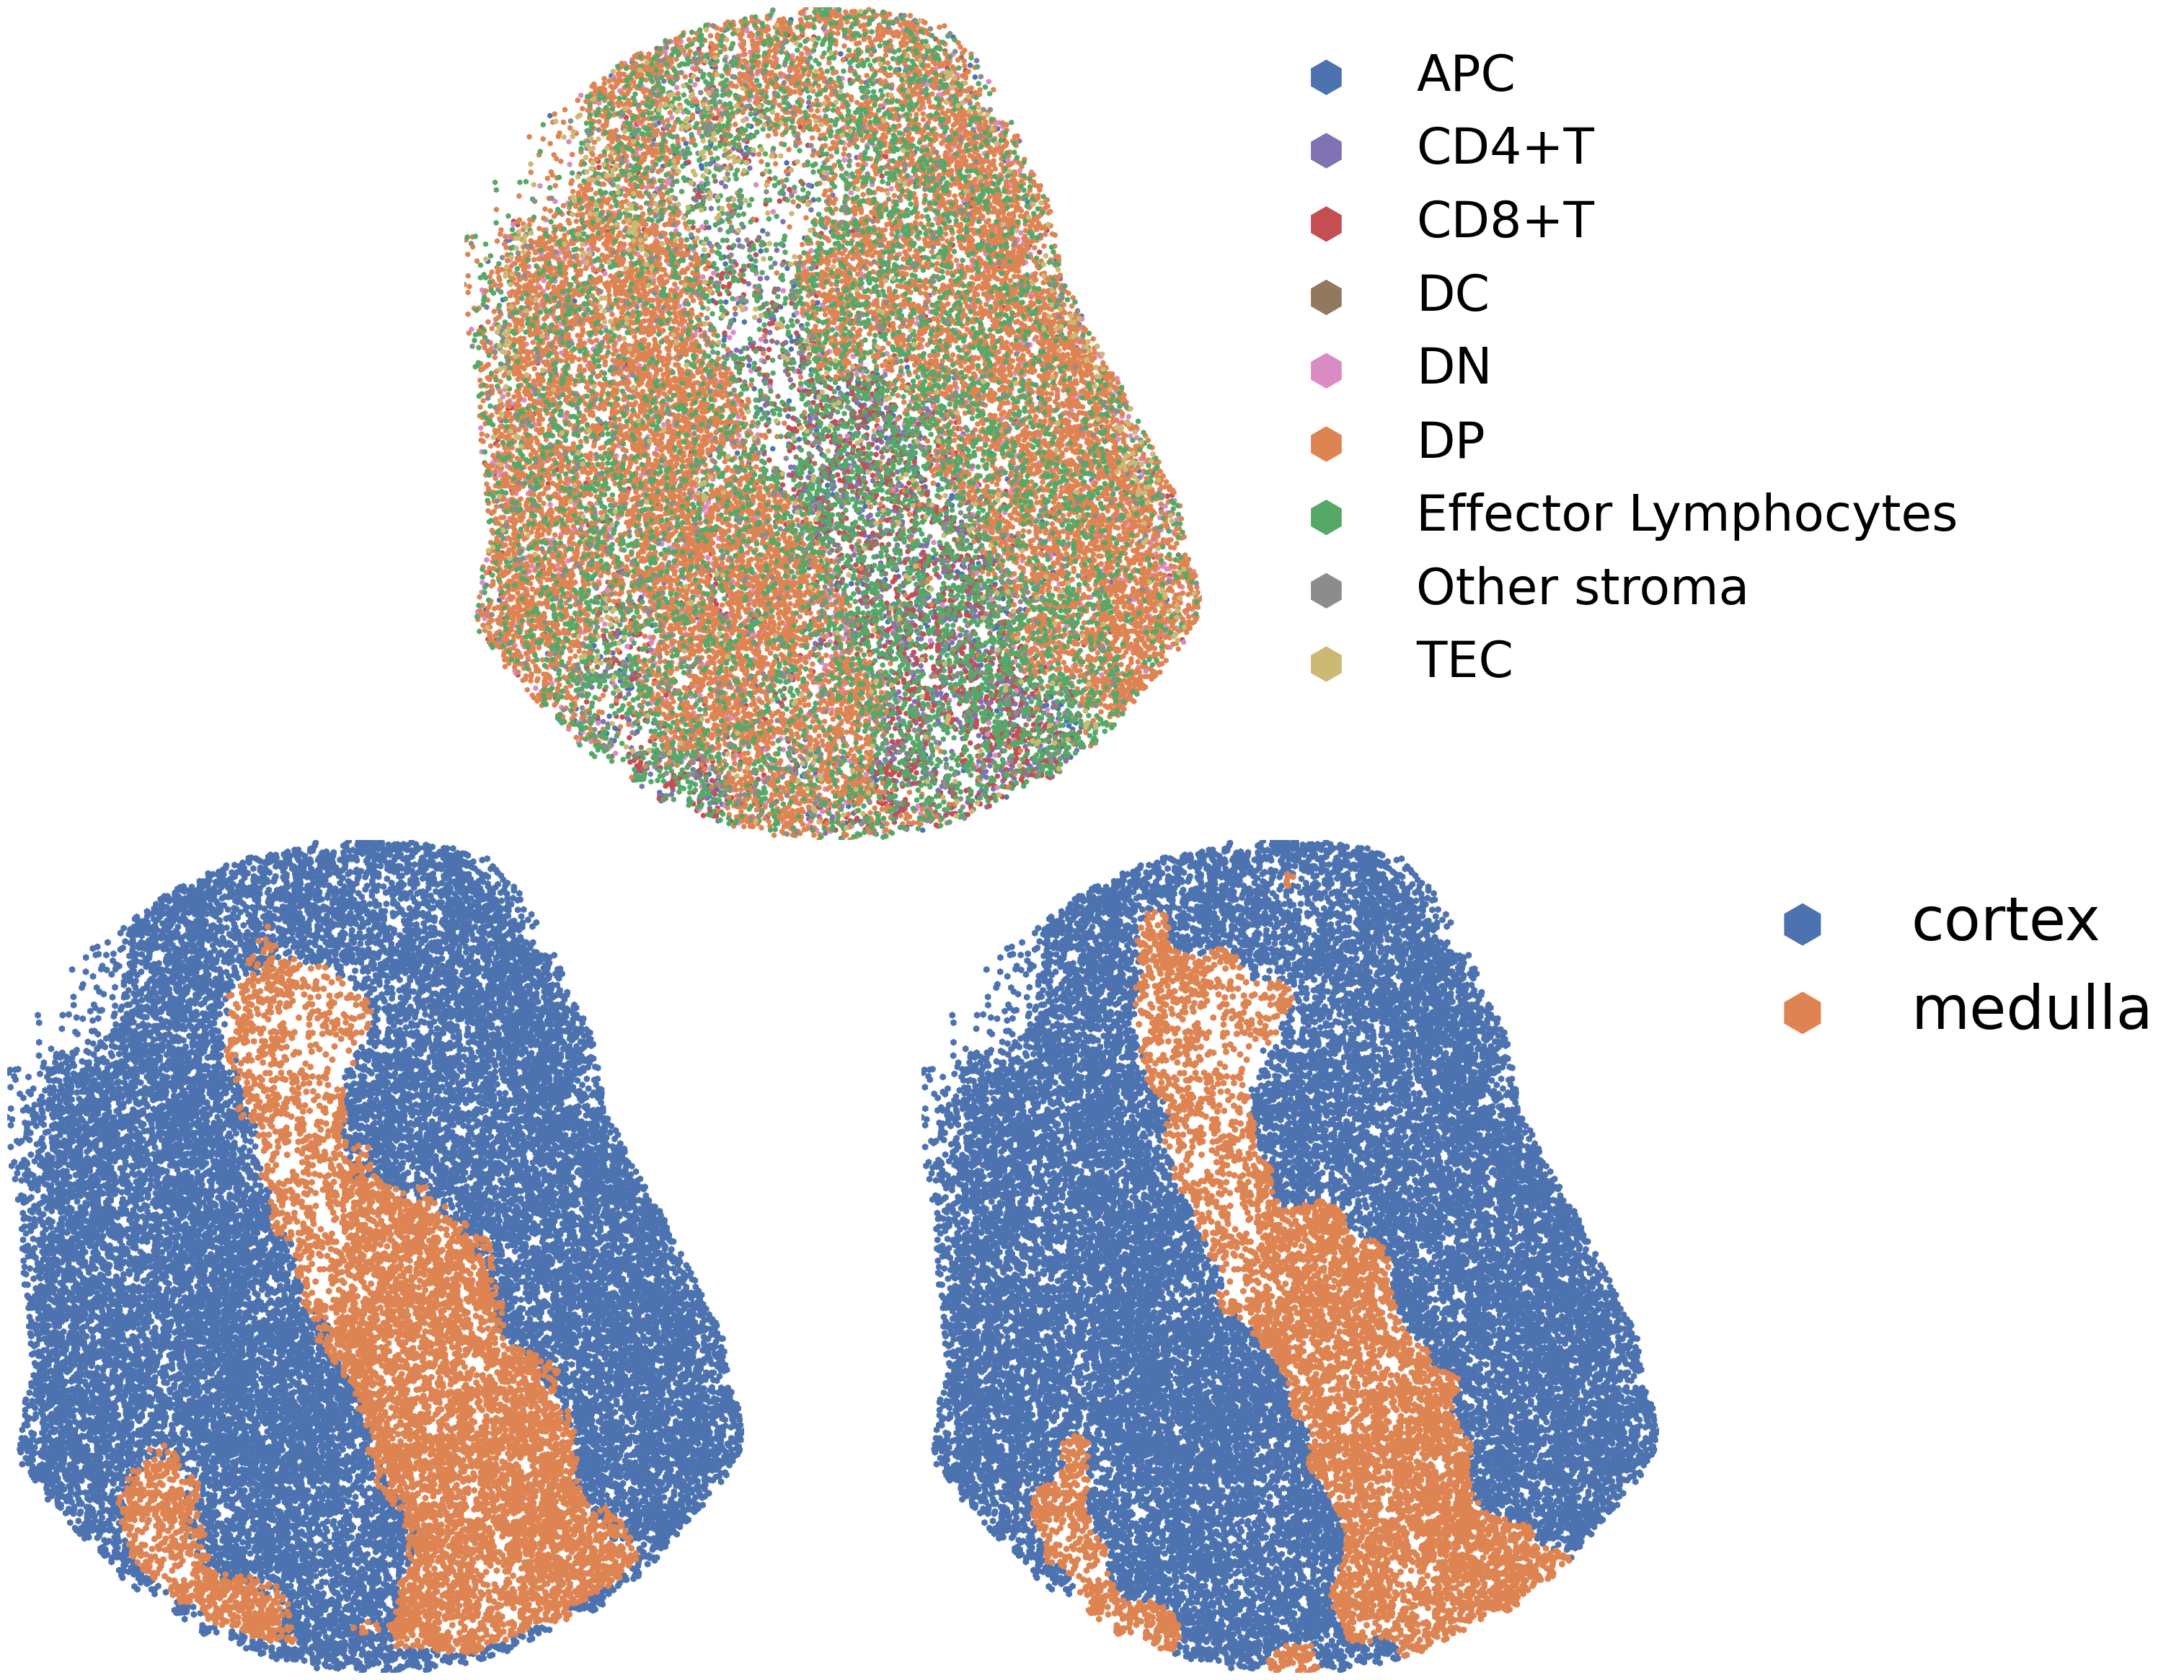

In [11]:
from functools import reduce

# Create a figure
fig = plt.figure(figsize=(30, 30))

# Define the grid layout
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], hspace=0.0)

s = 50
res = 0.2



i = 8

adata = anndata_list[i]
adata_cm = anndata_cm_list[i]



max_inds = np.argmax(adata.obsm[f'leiden_feature_dino_spot_features_res_{res}_one_hot'], axis=1)


## medulla is 1, 7, 8 
max_inds[reduce(np.logical_or, [max_inds==7, max_inds==8])] = 1

# cortex is rest
max_inds[reduce(np.logical_and, [max_inds!=7, max_inds!=8, max_inds !=1])] = 0


adata.obs[f'leiden_feature_dino_res_{res}'] = max_inds
adata.obs['cell_grouping'] = adata.obsm['cell_grouping_proportions'].idxmax(axis=1)

# subset to spots kept in cortex/medulla annotation
adata = adata[adata.obs.index.isin(adata_cm.obs.index)]


ax1 = fig.add_subplot(gs[0, 0:2])
scatter(adata, 'cell_grouping', x_key='y_val', y_key='x_val', mode='categorical', cdict=cdict, s=s/2+10, fig=fig, ax=ax1, ticks_off=True, show_legend=True, rasterized=True, legend_fontsize=legendfontsize - 30, legend_markersize=6);
ax1.set_facecolor('white')
ax1.axis('off')

ax2 = fig.add_subplot(gs[1, 0])
scatter(adata, 'leiden_feature_dino_res_0.2', x_key='y_val', y_key='x_val', mode='categorical', cdict=cdict_clusters, s=s, fig=fig, ax=ax2, ticks_off=True, show_legend=False, rasterized=True);
ax2.set_facecolor('white')
ax2.axis("off")

ax3 = fig.add_subplot(gs[1, 1])
scatter(adata_cm, 'cortex_medulla', x_key='y_val', y_key='x_val', mode='categorical', cdict=cdict_cm, s=s, fig=fig, ax=ax3, ticks_off=True, show_legend=True, rasterized=True, legend_fontsize=legendfontsize - 20, legend_markersize=6);
ax3.set_facecolor('white')
ax3.axis("off")

fig.savefig('./plots/Supp_fig_3a.pdf', transparent=True, dpi=600, bbox_inches='tight')


## panel supp 3b

In [12]:
## calculate mutual information for each method in a sample specific manner

In [13]:
## spaGCN clustering MI

## compute MI after running

results_dir = os.path.abspath("../benchmarking/spagcn/spagcn_results_thymus/")

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(results_dir):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)

list_of_sample_mi = []
for fname in fname_list:

    print("Running " + fname)
    adata = sc.read(os.path.join(results_dir, fname))

    sample_mi = sklearn.metrics.mutual_info_score(adata.obs["cortex_medulla"], adata.obs["pred"])

    list_of_sample_mi.append(sample_mi)

spagcn_mi = list_of_sample_mi
print(np.median(spagcn_mi))

['thymus_day_3.1_results.h5ad', 'thymus_week_28.2_results.h5ad', 'thymus_day_13.1_results.h5ad', 'thymus_week_32.2_results.h5ad', 'thymus_week_32.3_results.h5ad', 'thymus_week_3.2_results.h5ad', 'thymus_day_7.1_results.h5ad', 'thymus_day_1.1_results.h5ad', 'thymus_week_7.1_results.h5ad', 'thymus_week_13.2_results.h5ad', 'thymus_day_5.1_results.h5ad', 'thymus_week_13.1_results.h5ad', 'thymus_day_0.2_results.h5ad', 'thymus_week_15.1_results.h5ad', 'thymus_day_2.2_results.h5ad', 'thymus_week_9.2_results.h5ad', 'thymus_week_48.1_results.h5ad', 'thymus_week_15.2_results.h5ad', 'thymus_week_4.2_results.h5ad', 'thymus_week_28.1_results.h5ad', 'thymus_week_3.1_results.h5ad', 'thymus_day_2.3_results.h5ad', 'thymus_week_48.2_results.h5ad', 'thymus_week_9.1_results.h5ad', 'thymus_day_13.2_results.h5ad', 'thymus_week_4.3_results.h5ad', 'thymus_week_7.2_results.h5ad', 'thymus_day_10.2_results.h5ad', 'thymus_day_4.2_results.h5ad', 'thymus_day_3.3_results.h5ad', 'thymus_week_68.2_results.h5ad', 'thym

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_13.1_results.h5ad
Running thymus_week_32.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_32.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_3.2_results.h5ad
Running thymus_day_7.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_1.1_results.h5ad
Running thymus_week_7.1_results.h5ad
Running thymus_week_13.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_5.1_results.h5ad
Running thymus_week_13.1_results.h5ad
Running thymus_day_0.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_15.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_2.2_results.h5ad
Running thymus_week_9.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_48.1_results.h5ad
Running thymus_week_15.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_4.2_results.h5ad
Running thymus_week_28.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_3.1_results.h5ad
Running thymus_day_2.3_results.h5ad
Running thymus_week_48.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_9.1_results.h5ad
Running thymus_day_13.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_4.3_results.h5ad
Running thymus_week_7.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_10.2_results.h5ad
Running thymus_day_4.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_3.3_results.h5ad
Running thymus_week_68.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_5.2_results.h5ad
Running thymus_week_5.1_results.h5ad
Running thymus_week_90.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_5.2_results.h5ad
Running thymus_week_5.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_4.1_results.h5ad
Running thymus_day_10.1_results.h5ad
Running thymus_week_68.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_7.2_results.h5ad
Running thymus_week_68.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_90.2_results.h5ad
Running thymus_week_32.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_3.2_results.h5ad
Running thymus_day_2.1_results.h5ad
Running thymus_day_0.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_1.2_results.h5ad
0.1588932610254072


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [14]:
### stagate clustering MI

results_dir = os.path.abspath("../benchmarking/stagate/stagate_results_thymus/")

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(results_dir):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)


list_of_sample_mi = []
for fname in fname_list:

    print("Running " + fname)
    adata = sc.read(os.path.join(results_dir, fname))

    stargate_pred = np.array(adata.obs["louvain"]).astype(int)

    sample_mi = sklearn.metrics.mutual_info_score(adata.obs["cortex_medulla"], stargate_pred)
    list_of_sample_mi.append(sample_mi)


stagate_mi = list_of_sample_mi
print(np.median(list_of_sample_mi))

['thymus_day_3.1_results.h5ad', 'thymus_week_28.2_results.h5ad', 'thymus_day_13.1_results.h5ad', 'thymus_week_32.2_results.h5ad', 'thymus_week_32.3_results.h5ad', 'thymus_week_3.2_results.h5ad', 'thymus_day_7.1_results.h5ad', 'thymus_day_1.1_results.h5ad', 'thymus_week_7.1_results.h5ad', 'thymus_week_13.2_results.h5ad', 'thymus_day_5.1_results.h5ad', 'thymus_week_13.1_results.h5ad', 'thymus_day_0.2_results.h5ad', 'thymus_week_15.1_results.h5ad', 'thymus_day_2.2_results.h5ad', 'thymus_week_9.2_results.h5ad', 'thymus_week_48.1_results.h5ad', 'thymus_week_15.2_results.h5ad', 'thymus_week_4.2_results.h5ad', 'thymus_week_28.1_results.h5ad', 'thymus_week_3.1_results.h5ad', 'thymus_day_2.3_results.h5ad', 'thymus_week_48.2_results.h5ad', 'thymus_week_9.1_results.h5ad', 'thymus_day_13.2_results.h5ad', 'thymus_week_4.3_results.h5ad', 'thymus_week_7.2_results.h5ad', 'thymus_day_10.2_results.h5ad', 'thymus_day_4.2_results.h5ad', 'thymus_day_3.3_results.h5ad', 'thymus_week_68.2_results.h5ad', 'thym

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_28.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_13.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_32.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_32.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_3.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_7.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_1.1_results.h5ad
Running thymus_week_7.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_13.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_5.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_13.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_0.2_results.h5ad
Running thymus_week_15.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_2.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_9.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_48.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_15.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_4.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_28.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_3.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_2.3_results.h5ad
Running thymus_week_48.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_9.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_13.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_4.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_7.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_10.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_4.2_results.h5ad
Running thymus_day_3.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_68.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_5.2_results.h5ad
Running thymus_week_5.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_90.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_5.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_5.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_4.1_results.h5ad
Running thymus_day_10.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_68.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_7.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_68.3_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_90.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_week_32.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_3.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_2.1_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Running thymus_day_0.1_results.h5ad
Running thymus_day_1.2_results.h5ad


/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


0.2988232929893974


In [15]:
### compute MI across all anndatas for DINO

## loop over all resolutions
res = 0.2

list_of_sample_mi = []
for adata, adata_cm in zip(anndata_list, anndata_cm_list):

    max_inds = np.argmax(adata.obsm[f'leiden_feature_dino_spot_features_res_{res}_one_hot'], axis=1)


    adata.obs[f'leiden_feature_dino_res_{res}'] = max_inds
    adata.obs['cell_grouping'] = adata.obsm['cell_grouping_proportions'].idxmax(axis=1)

    # subset to spots kept in cortex/medulla annotation
    adata = adata[adata.obs.index.isin(adata_cm.obs.index)]

    cortex_medulla = adata_cm.obs['cortex_medulla']
    y_true = np.where(cortex_medulla == 'cortex', 0, 1)

    tp_cluster = adata.obs[f'leiden_feature_dino_res_{res}']
    dino_mi = sklearn.metrics.mutual_info_score(y_true, tp_cluster)
    list_of_sample_mi.append(dino_mi)

dino_mi = list_of_sample_mi
print(f"res: {res}, median ARI: {np.median(list_of_sample_mi)}")

res: 0.2, median ARI: 0.30792226431897074


In [16]:
import seaborn as sns
colors = sns.color_palette("deep", 10).as_hex()

In [17]:
## ncv clustering

out_dir = os.path.abspath("../TissueMosaic_output/thymus/thymus_patch_clusters_thymus_test/")

In [18]:
fname_list = []
for f in os.listdir(out_dir):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)

anndata_list = []

for fname in fname_list:
    adata = read_h5ad(os.path.join(out_dir, fname))
    anndata_list.append(adata)

['thymus_week_7.2.h5ad', 'thymus_week_4.3.h5ad', 'thymus_day_2.2.h5ad', 'thymus_day_7.2.h5ad', 'thymus_week_3.2.h5ad', 'thymus_week_68.3.h5ad', 'thymus_day_4.2.h5ad', 'thymus_day_0.1.h5ad', 'thymus_day_1.2.h5ad', 'thymus_day_1.1.h5ad', 'thymus_week_68.1.h5ad', 'thymus_day_3.2.h5ad', 'thymus_day_3.1.h5ad', 'thymus_week_90.1.h5ad', 'thymus_week_9.2.h5ad', 'thymus_week_9.1.h5ad', 'thymus_week_15.2.h5ad', 'thymus_day_3.3.h5ad', 'thymus_week_28.2.h5ad', 'thymus_week_68.2.h5ad', 'thymus_week_32.3.h5ad', 'thymus_week_13.1.h5ad', 'thymus_day_2.1.h5ad', 'thymus_week_5.2.h5ad', 'thymus_day_7.1.h5ad', 'thymus_week_32.1.h5ad', 'thymus_day_4.1.h5ad', 'thymus_week_28.1.h5ad', 'thymus_day_10.1.h5ad', 'thymus_week_48.1.h5ad', 'thymus_week_5.3.h5ad', 'thymus_week_4.2.h5ad', 'thymus_week_90.2.h5ad', 'thymus_week_7.1.h5ad', 'thymus_week_32.2.h5ad', 'thymus_day_10.2.h5ad', 'thymus_day_5.2.h5ad', 'thymus_week_15.1.h5ad', 'thymus_day_2.3.h5ad', 'thymus_week_3.1.h5ad', 'thymus_day_5.1.h5ad', 'thymus_week_48.

In [19]:
### compute mutual information across all anndatas

list_of_ncv_mi = []
for adata in anndata_list:

    res = 0.05
    y_pred = np.argmax(adata.obsm['leiden_feature_patch_ncv_res_' + str(res) + '_one_hot'], axis=1)

    y_true = np.where(adata.obs['cortex_medulla'] == 'cortex', 0, 1)
    mi_ncv = sklearn.metrics.mutual_info_score(y_true, y_pred)
    
    list_of_ncv_mi.append(mi_ncv)

ncv_mi = list_of_ncv_mi

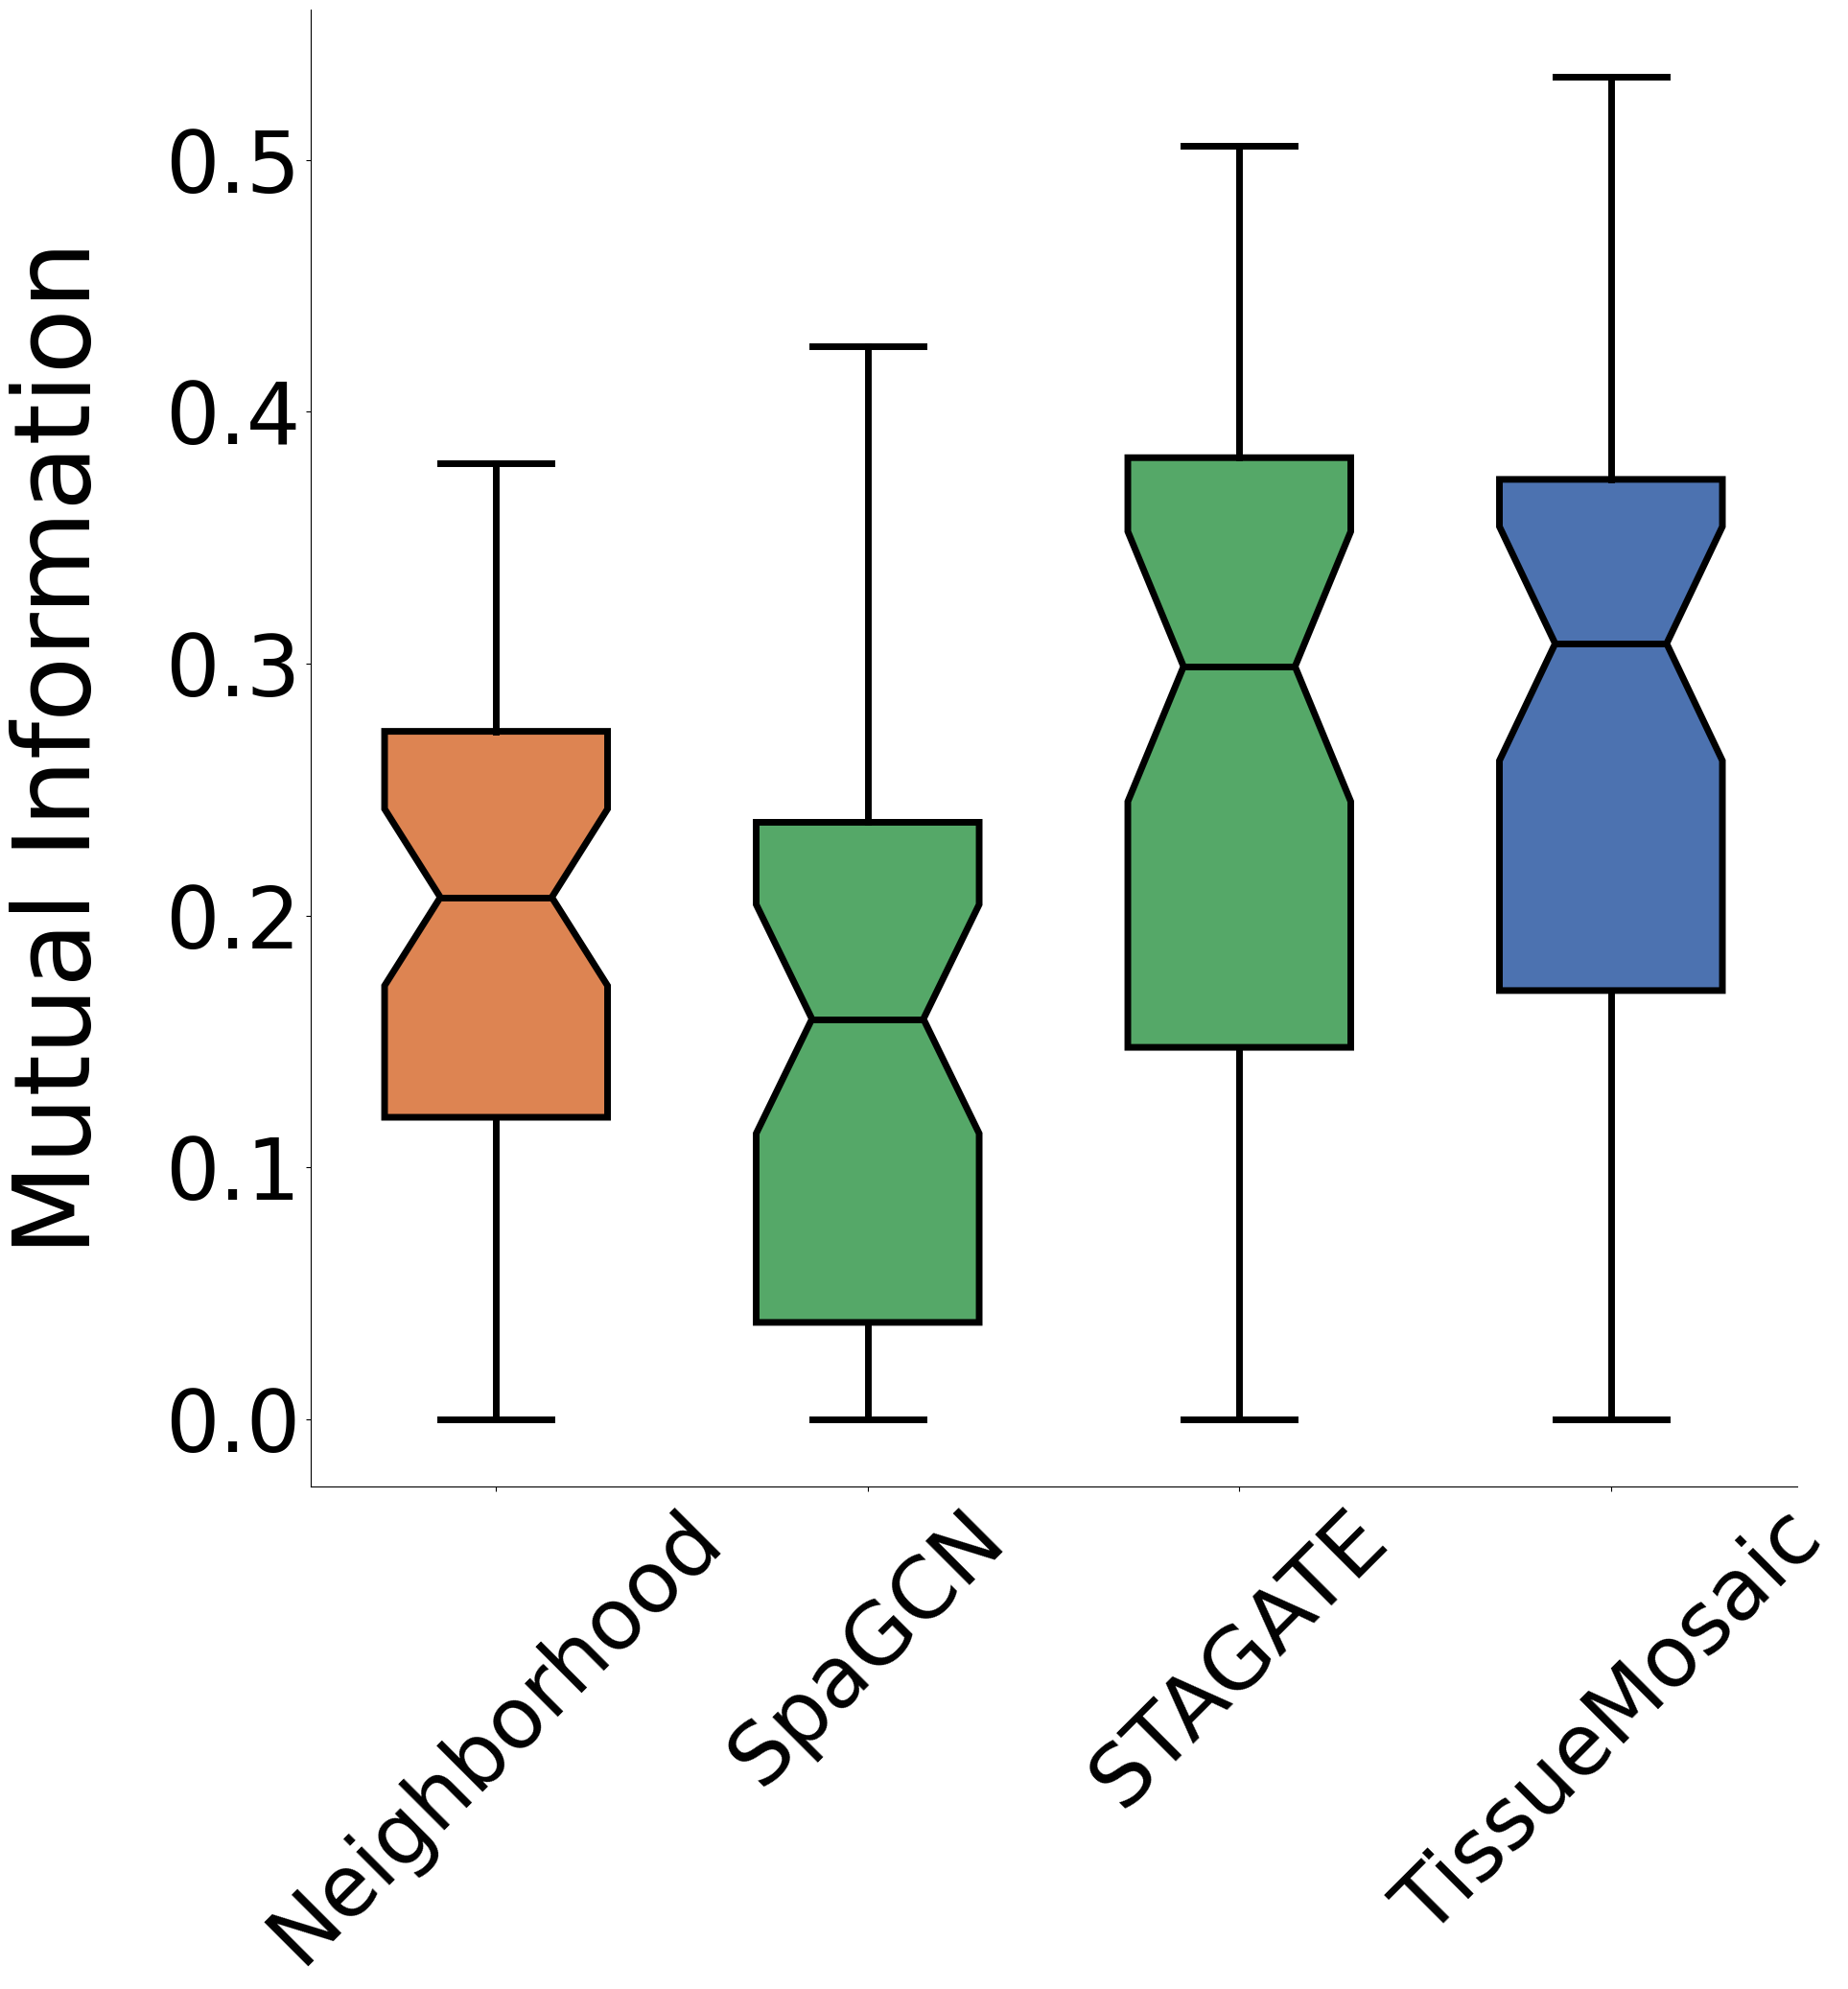

In [20]:

fig, ax = plt.subplots(figsize=(20, 20))

### plot MI of clusterings

import scipy


boxplot = ax.boxplot([ncv_mi, spagcn_mi, stagate_mi, dino_mi], labels=['Neighborhood', 'SpaGCN', 'STAGATE', 'TissueMosaic'], widths=0.6, patch_artist=True, 
                     medianprops=dict(color='black', linewidth=5), 
                     whiskerprops=dict(color='black', linewidth=5), notch=True, capprops=dict(color='black', linewidth=5), 
                     boxprops=dict(color='black', linewidth=5),
                     flierprops=dict(marker='o', markerfacecolor='black', markersize=10))
boxplot_colors = [colors[1], colors[2], colors[2], colors[0]]
for patch, color in zip(boxplot['boxes'], boxplot_colors):
    patch.set_facecolor(color)
plt.xticks(rotation=45)
plt.ylabel("Mutual Information", fontsize=labelfontsize, labelpad=labelpad)

ax.tick_params(axis='both', labelsize=4*tickfontsize/5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('./plots/Supp_fig_3c.pdf', transparent=True, bbox_inches='tight', dpi=600)
